# Problem statement
### Prepare a classification model using Naive Bayes
for salary data

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work
education	-- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation	 -- occupation of an individuals
relationship --
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importing CSV File

In [2]:
# Importing the Train Data
df_train=pd.read_csv('SalaryData_Train.csv')
df_train.head(4)

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   

           occupation    relationship    race    sex  capitalgain  \
0        Adm-clerical   Not-in-family   White   Male         2174   
1     Exec-managerial         Husband   White   Male            0   
2   Handlers-cleaners   Not-in-family   White   Male            0   
3   Handlers-cleaners         Husband   Black   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K

In [3]:
# Importing the Test Data
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.head(4)

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   

           occupation relationship    race    sex  capitalgain  capitalloss  \
0   Machine-op-inspct    Own-child   Black   Male            0            0   
1     Farming-fishing      Husband   White   Male            0            0   
2     Protective-serv      Husband   White   Male            0            0   
3   Machine-op-inspct      Husband   Black   Male         7688            0   

   hoursperweek          native  Salary  
0            40   United-States   <=50K  
1            50   United-States   <=50K  
2            40   United-States    >50K  
3            40   United-States    >50K

# EDA

In [4]:
df_train.shape

(30161, 14)

In [5]:
df_test.shape

(15060, 14)

In [6]:
#View summary of Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
# to see the statistical description
df_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [8]:
# sum of duplicated rows
df_train.duplicated().sum()

3258

In [9]:
# total values in train dataset
df_train.value_counts().sum()

30161

In [10]:
#View summary of Train dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
# to see the statistical description
df_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [12]:
# sum of duplicated rows
df_test.duplicated().sum()

930

In [13]:
# sum of total values in test dataset
df_test.value_counts().sum()

15060

In [14]:
df_train['Salary'].unique() # to check the different values in salary column

array([' <=50K', ' >50K'], dtype=object)

In [15]:
df_test['Salary'].unique()# to check the different values in salary column

array([' <=50K', ' >50K'], dtype=object)

#### Feature Engineering

In [16]:
print('Shape of train dataframe before dropping duplicates')
print(df_train.shape)
print('Shape of test dataframe before dropping duplicates')
print(df_test.shape)

Shape of train dataframe before dropping duplicates
(30161, 14)
Shape of test dataframe before dropping duplicates
(15060, 14)


In [17]:
# dropping the duplicates
df_train.drop_duplicates(keep=False,inplace=True)

In [18]:
df_train.shape

(24943, 14)

In [19]:
# dropping the duplicates
df_test.drop_duplicates(keep=False,inplace=True)

In [20]:
df_test.shape

(13450, 14)

In [21]:
print('Shape of train dataframe after dropping duplicates')
print(df_train.shape)
print('Shape of test dataframe after dropping duplicates')
print(df_test.shape)


Shape of train dataframe after dropping duplicates
(24943, 14)
Shape of test dataframe after dropping duplicates
(13450, 14)


In [22]:
df_train.drop('native',axis=1,inplace=True) # dropping native column

In [23]:
df_test.drop('native',axis=1,inplace=True) # dropping native column

In [24]:
df_train.head(4)

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   

           occupation    relationship    race    sex  capitalgain  \
0        Adm-clerical   Not-in-family   White   Male         2174   
1     Exec-managerial         Husband   White   Male            0   
2   Handlers-cleaners   Not-in-family   White   Male            0   
3   Handlers-cleaners         Husband   Black   Male            0   

   capitalloss  hoursperweek  Salary  
0            0            40   <=50K  
1            0            13   <=50K  
2            0            40   <=50K  
3            0            40   <=50K

In [25]:
df_test.head(4)

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   

           occupation relationship    race    sex  capitalgain  capitalloss  \
0   Machine-op-inspct    Own-child   Black   Male            0            0   
1     Farming-fishing      Husband   White   Male            0            0   
2     Protective-serv      Husband   White   Male            0            0   
3   Machine-op-inspct      Husband   Black   Male         7688            0   

   hoursperweek  Salary  
0            40   <=50K  
1            50   <=50K  
2            40    >50K  
3            40    >50K

#### Label Encoding Categorical Columns of train and test dataset

In [26]:
# find categorical variables
cols = [var for var in df_train.columns if df_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(cols)))
print('The categorical variables are :\n\n', cols)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'Salary']


In [27]:
# Label encoder converts categorical columns to numerical by giving each value a label
LE=preprocessing.LabelEncoder()
for col in cols:

    df_train[col]=LE.fit_transform(df_train[col])
    df_test[col]=LE.fit_transform(df_test[col])
    print(LE.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [28]:
df_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  Salary  
0             1     4    1         2174            0            40       0  
1             0     4    1            0            0            13       0  
2             1     4    1            0            0            40       0  
3             0     2    1            0            0            40       0  
4             5     2    0            0            0            40       0

In [29]:
df_test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  Salary  
0             3     2    1            0            0            40       0  
1             0     4    1            0            0            50       0  
2             0     4    1            0            0            40       1  
3             0     2    1         7688            0            40       1  
4             1     4    1            0            0            30       0

In [30]:
# check for cardinality in categorical variables
for c in cols:
    print(c, 'contains', len(df_train[c].unique()), 'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
Salary contains 2 labels


In [31]:
# Checking output column of train dataset
df_train['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [32]:
print("Percent of data labelled as 0:\n",(((df_train['Salary']==0).sum()/len(df_train))*100))
print("Percent of data labelled as 1:\n",(((df_train['Salary']==1).sum()/len(df_train))*100))

Percent of data labelled as 0:
 74.1129775889027
Percent of data labelled as 1:
 25.887022411097306


# Visualization

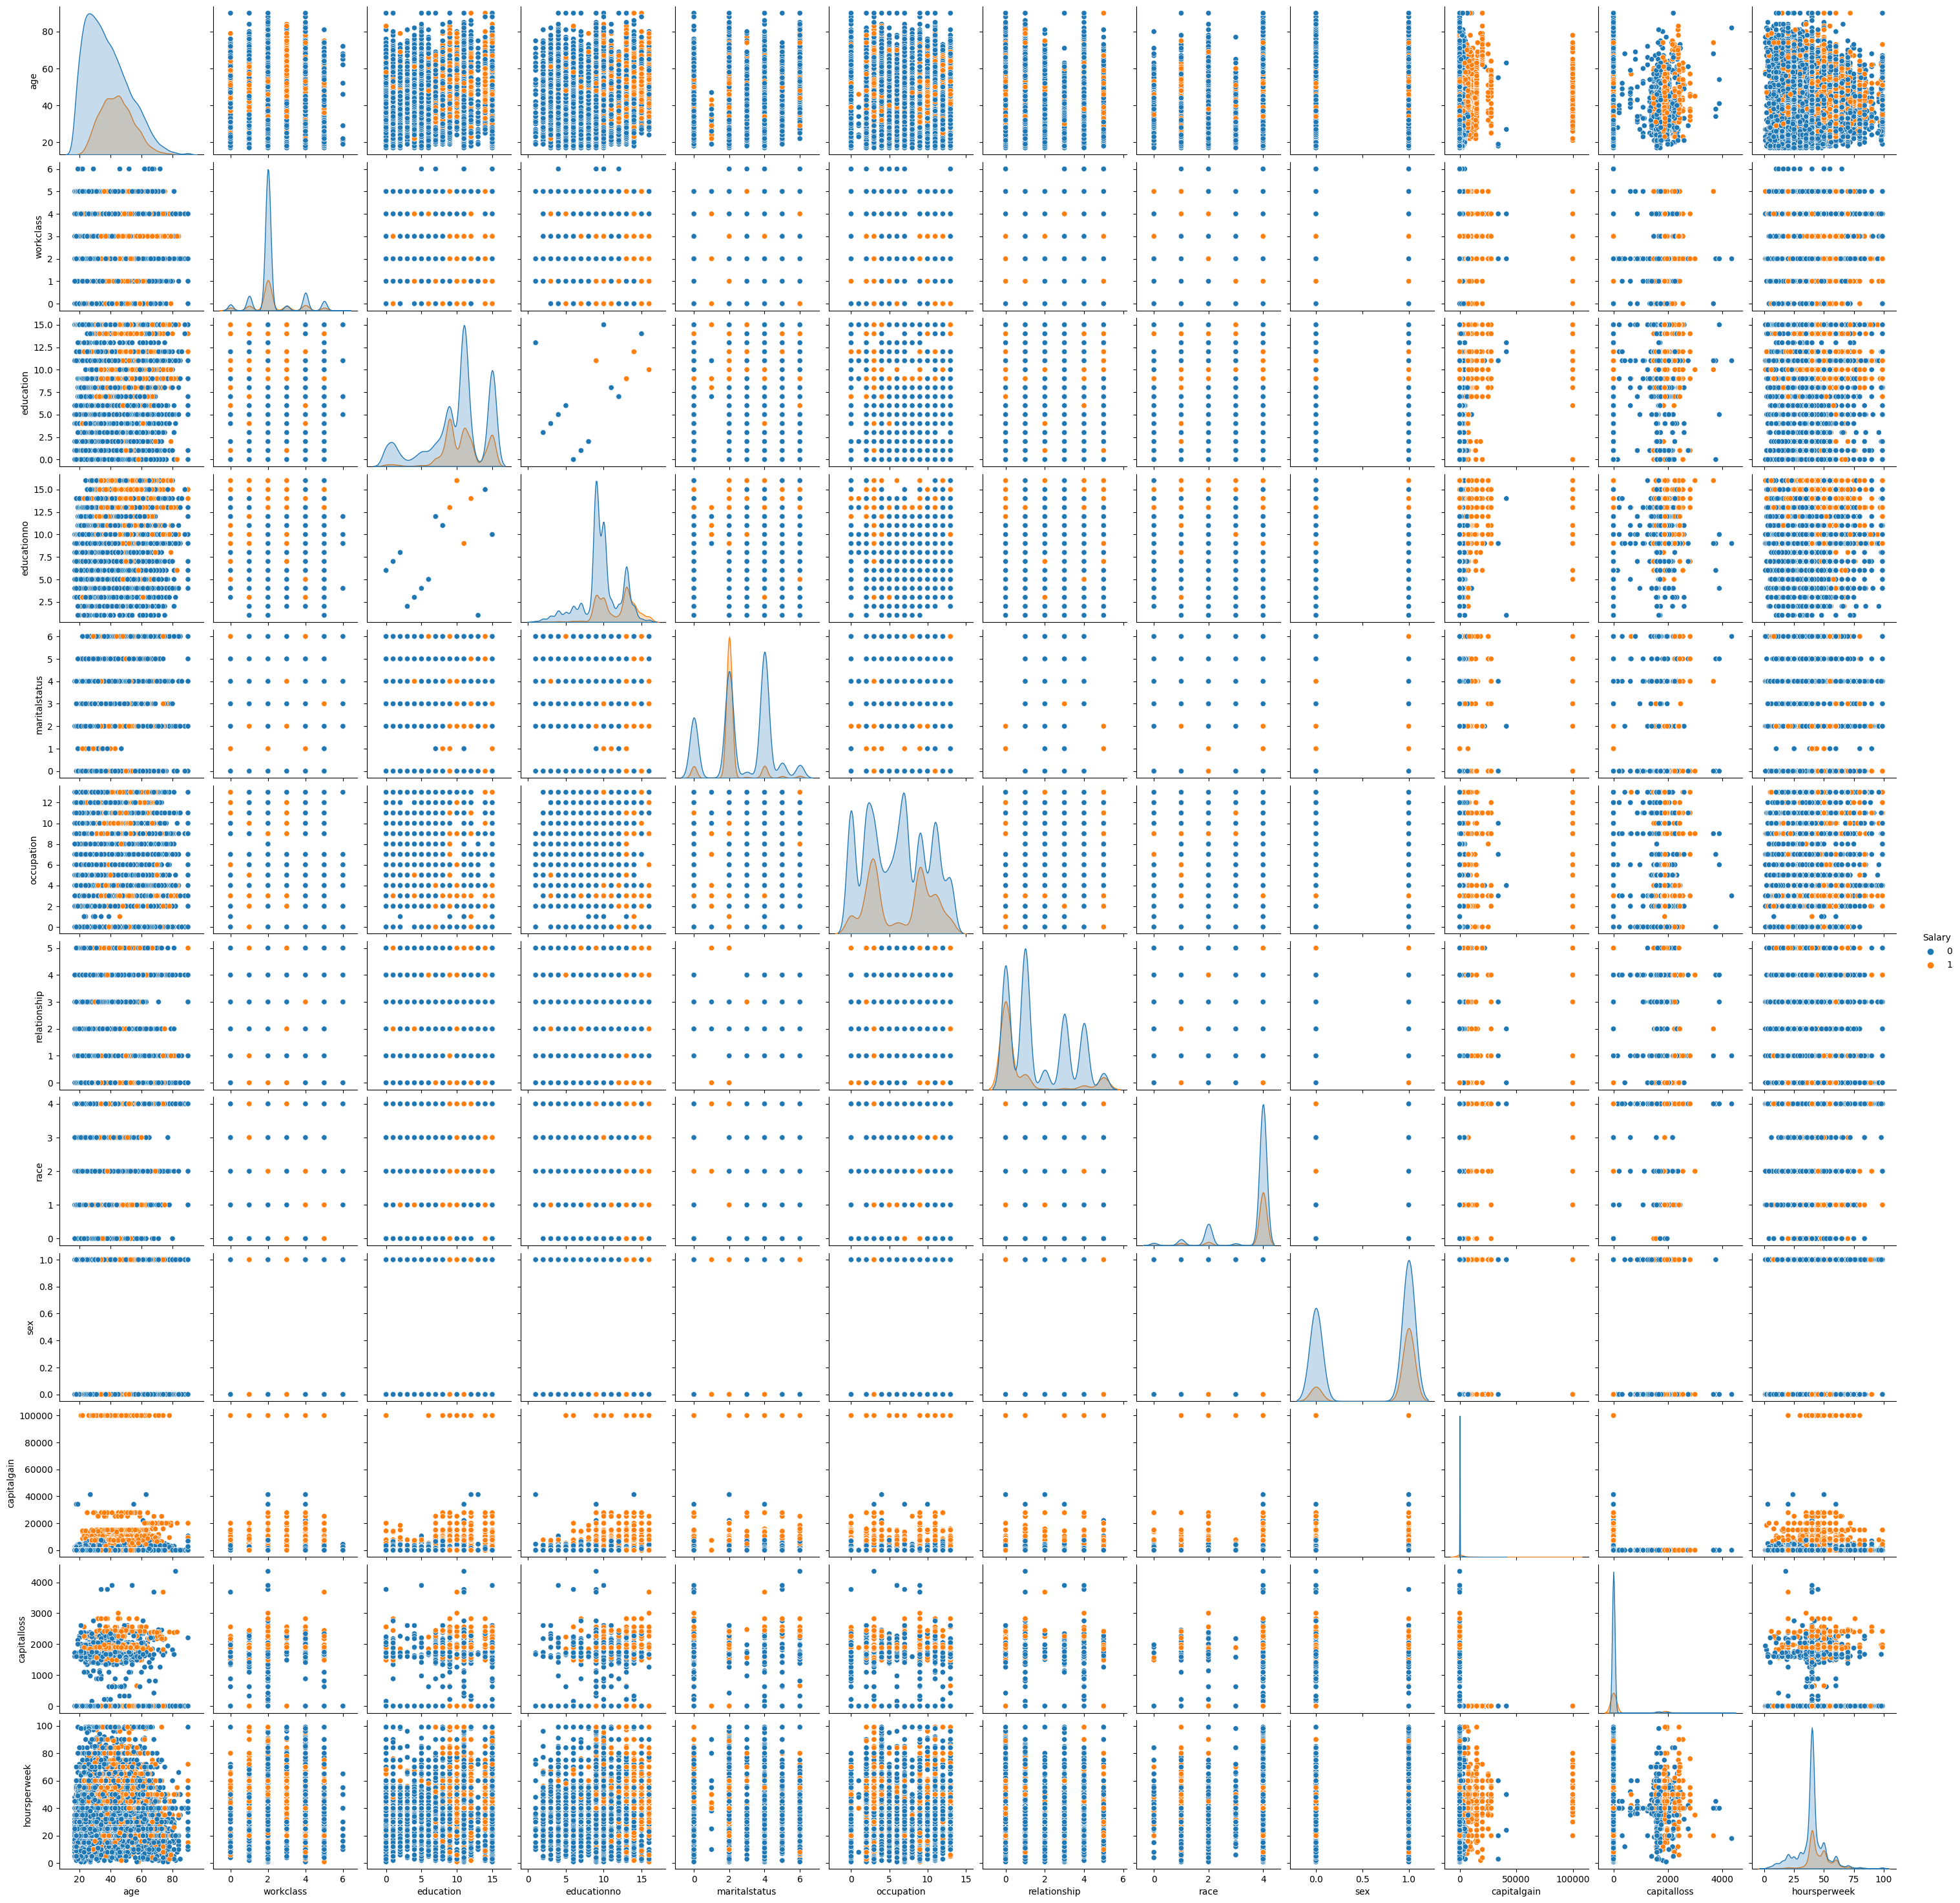

In [33]:
# Pair plot
sns.pairplot(df_train,hue='Salary')
plt.show()

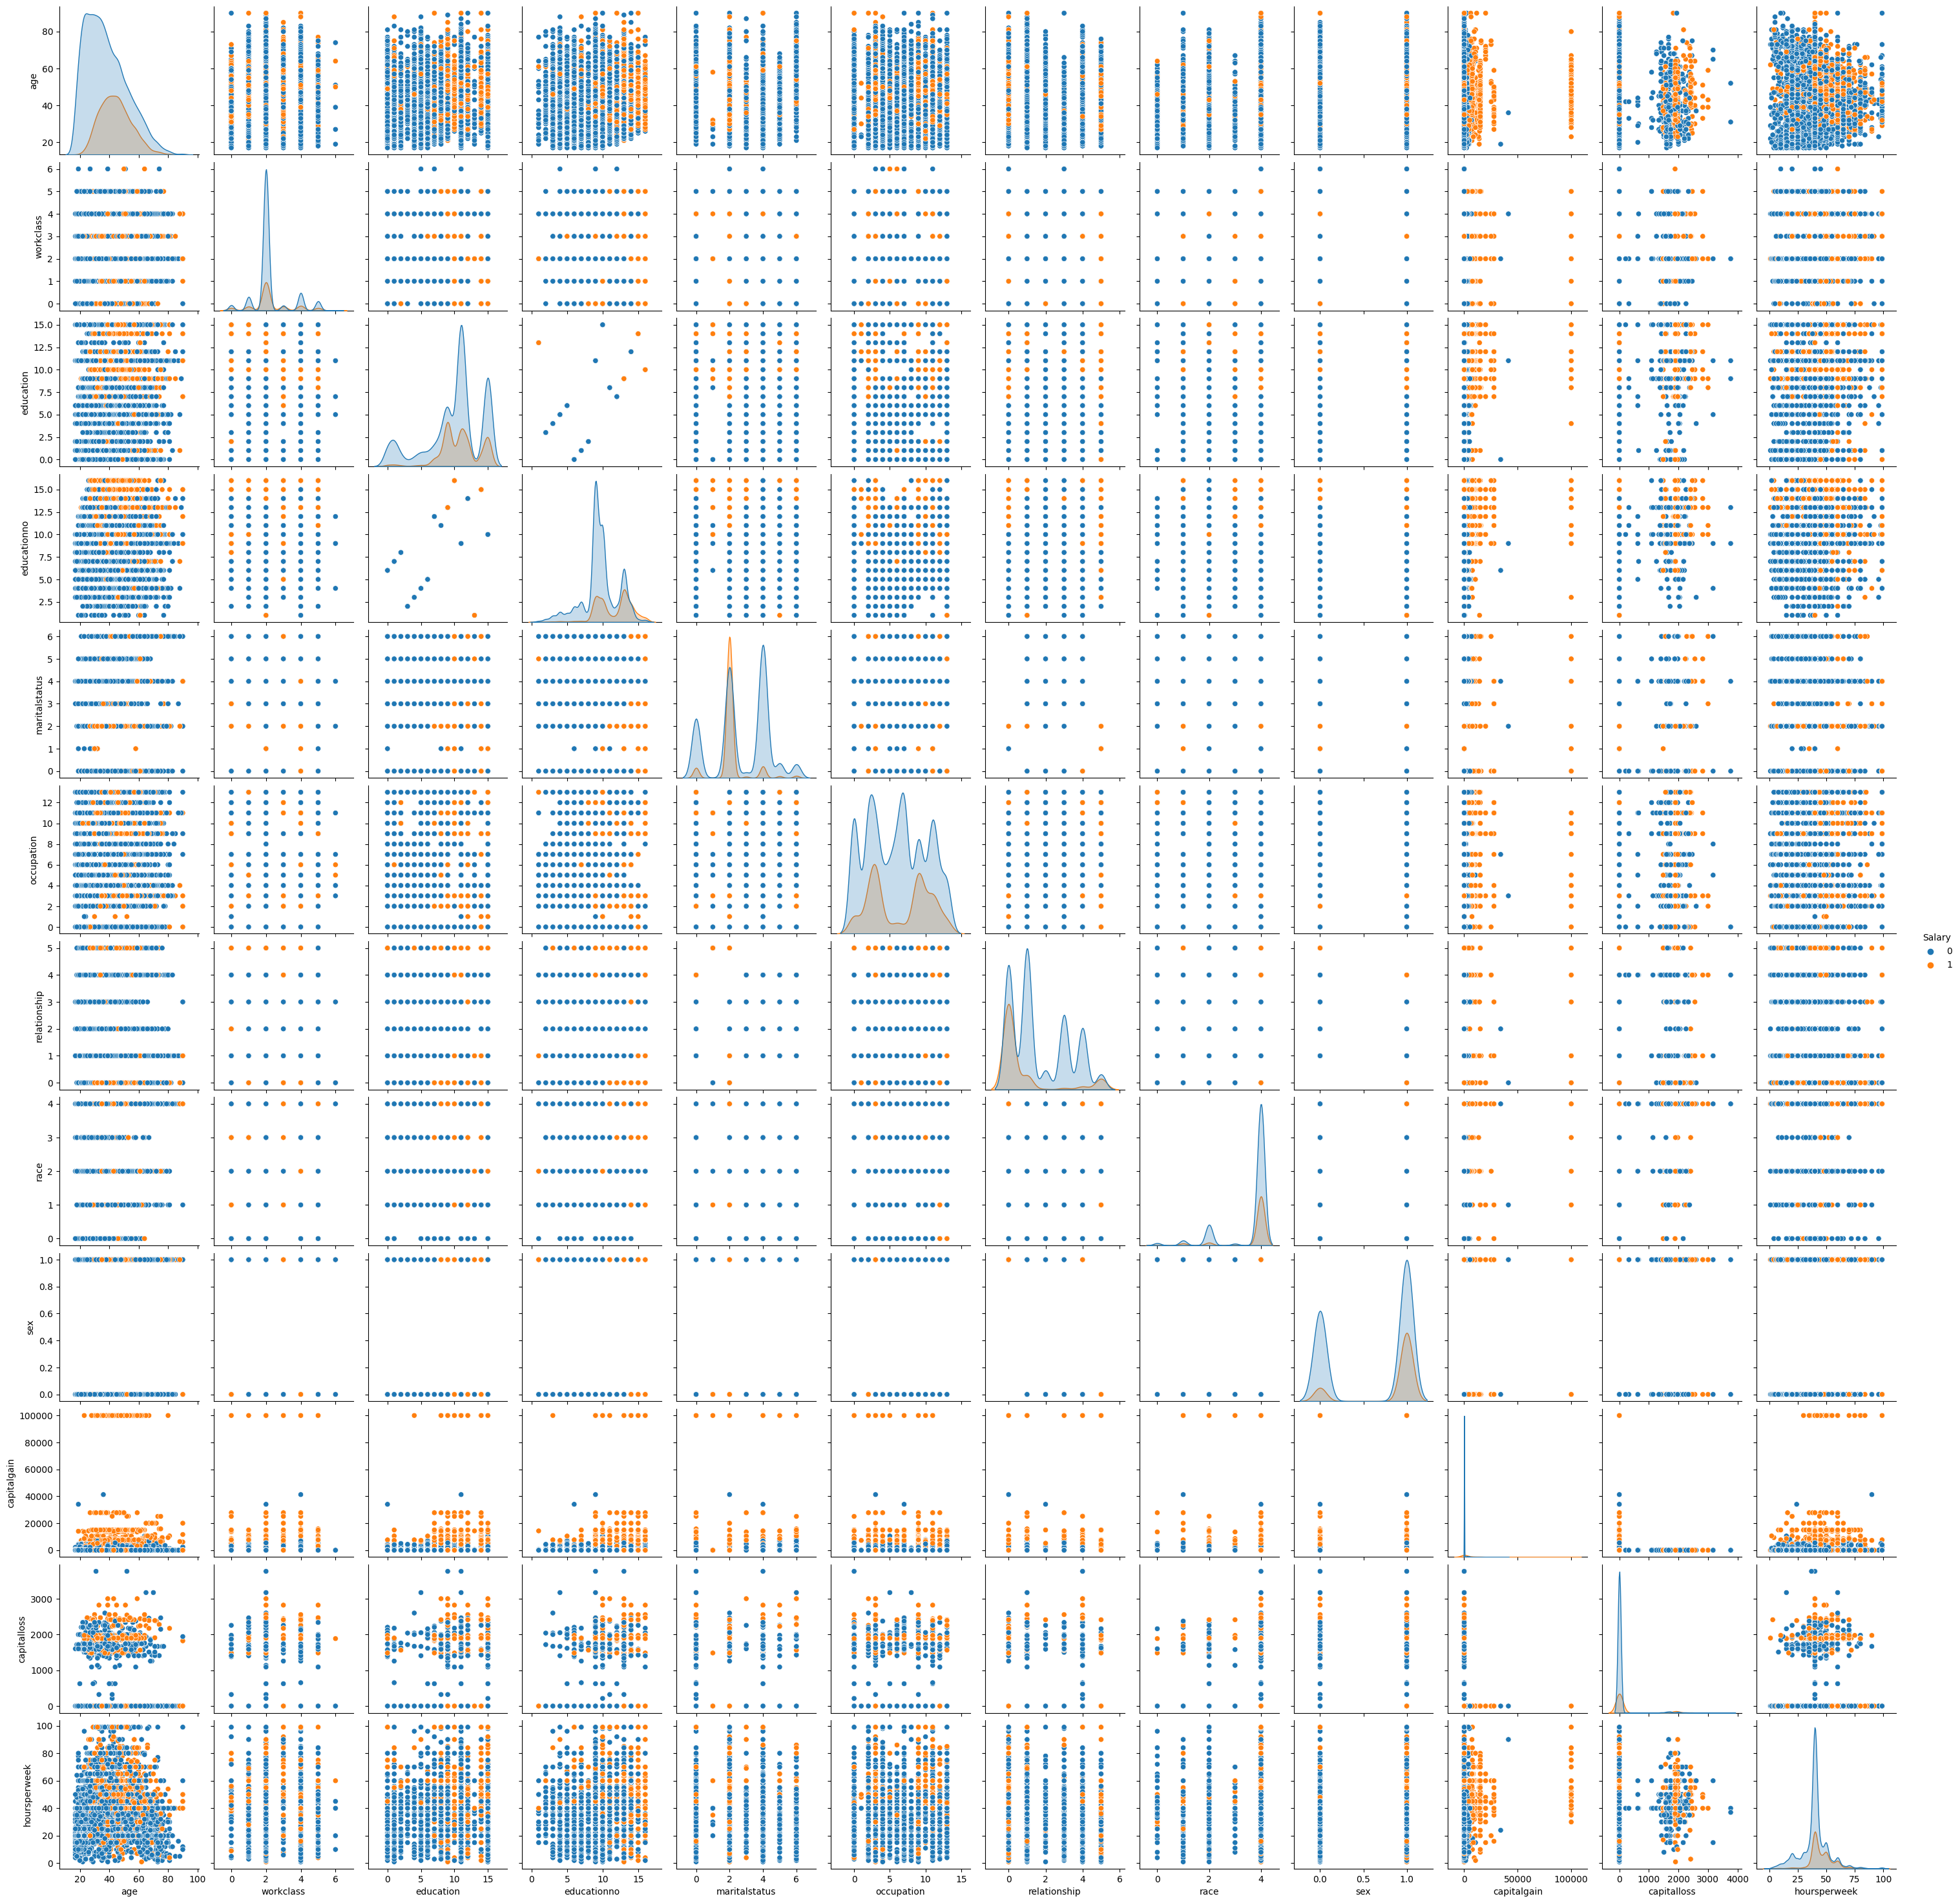

In [34]:
# Pair plot
sns.pairplot(df_test,hue='Salary')
plt.show()

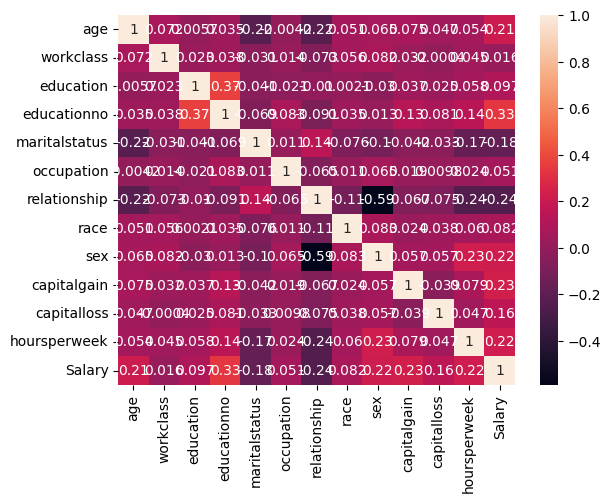

In [35]:
#to see statistic relation we use heatmap of df_train
sns.heatmap(df_train.corr(),annot=True)
plt.show()

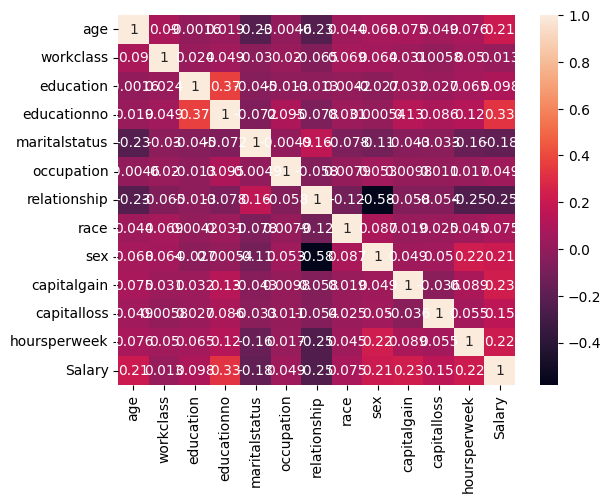

In [36]:
#to see statistic relation we use heatmap of df_test
sns.heatmap(df_test.corr(),annot=True)
plt.show()

# Feature selection on train dataset using ExtraTreesClassifier

In [37]:
X = df_train.drop(['Salary'], axis=1)
y = df_train['Salary']

In [38]:
X = X.fillna(0)
X

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30158   58          2         11            9              6           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  
0                 1     4    1         2174            0            40  
1                 0     4    1            0            0            13  
2                 1     4    1            0            0            40  
3                 0     2    1            0            0            40  
4                 5     2    0            0            0            40  
...             ...   ...  ...          ...          ...           ...  
30154             0     4    1            0            0            40  
30155             1     4    1            0            0            40  
30156             5     4    0            0            0            38  
30158             4     4    0            0            0            40  
30160             5     4    0        15024            0            40  

[24943 rows x 12 columns]

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 24943, dtype: int64

### checking target type

In [40]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [41]:
# defining the model with Extra Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
print(model.feature_importances_)


[0.21573948 0.05164348 0.04382913 0.07727112 0.08539917 0.09554943
 0.09707984 0.02097983 0.03131574 0.1110944  0.03497305 0.13512532]


In [42]:
model

ExtraTreesClassifier(n_estimators=10)

In [43]:
# to see column names
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [44]:
# to see importance of every feature (Columns)
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.215739
hoursperweek     0.135125
capitalgain      0.111094
relationship     0.097080
occupation       0.095549
maritalstatus    0.085399
educationno      0.077271
workclass        0.051643
education        0.043829
capitalloss      0.034973
sex              0.031316
race             0.020980
dtype: float64

# Visualization

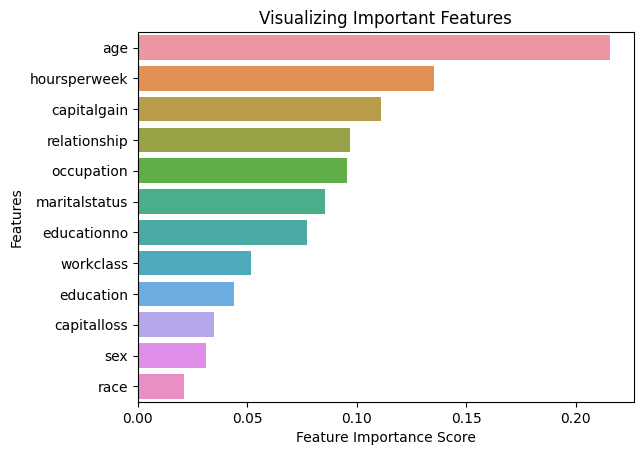

In [45]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [46]:
# Dropping the fivecolumns having least feature importance
df_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [47]:
# dropping the same columns from test dataset
df_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [48]:
df_train.head()

age  educationno  maritalstatus  occupation  relationship  capitalgain  \
0   39           13              4           0             1         2174   
1   50           13              2           3             0            0   
2   38            9              0           5             1            0   
3   53            7              2           5             0            0   
4   28           13              2           9             5            0   

   hoursperweek  Salary  
0            40       0  
1            13       0  
2            40       0  
3            40       0  
4            40       0

In [49]:
df_test.head()

age  educationno  maritalstatus  occupation  relationship  capitalgain  \
0   25            7              4           6             3            0   
1   38            9              2           4             0            0   
2   28           12              2          10             0            0   
3   44           10              2           6             0         7688   
4   34            6              4           7             1            0   

   hoursperweek  Salary  
0            40       0  
1            50       0  
2            40       1  
3            40       1  
4            30       0

In [50]:
# to see statistical data
df_train[['age','capitalgain','hoursperweek']].describe()

age   capitalgain  hoursperweek
count  24943.000000  24943.000000  24943.000000
mean      39.433909   1302.317724     41.283045
std       13.218143   8071.604978     12.592211
min       17.000000      0.000000      1.000000
25%       29.000000      0.000000     40.000000
50%       38.000000      0.000000     40.000000
75%       48.000000      0.000000     46.000000
max       90.000000  99999.000000     99.000000

In [51]:
# to see statistical data
df_test[['age','capitalgain','hoursperweek']].describe()

age   capitalgain  hoursperweek
count  13450.000000  13450.000000  13450.000000
mean      39.458364   1237.306468     41.158439
std       13.455382   8050.662571     12.417740
min       17.000000      0.000000      1.000000
25%       29.000000      0.000000     40.000000
50%       38.000000      0.000000     40.000000
75%       48.000000      0.000000     45.000000
max       90.000000  99999.000000     99.000000

In [52]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting and transforming train data
df_train[['age', 'capitalgain', 'hoursperweek']] = scaler.fit_transform(df_train[['age', 'capitalgain', 'hoursperweek']])

# Transforming test data
df_test[['age', 'capitalgain', 'hoursperweek']] = scaler.fit_transform(df_test[['age', 'capitalgain', 'hoursperweek']])

In [53]:
## Checking train dataset after standardization
df_train.head()

age  educationno  maritalstatus  occupation  relationship  \
0 -0.032827           13              4           0             1   
1  0.799379           13              2           3             0   
2 -0.108483            9              0           5             1   
3  1.026344            7              2           5             0   
4 -0.865034           13              2           9             5   

   capitalgain  hoursperweek  Salary  
0     0.107996     -0.101894       0  
1    -0.161349     -2.246120       0  
2    -0.161349     -0.101894       0  
3    -0.161349     -0.101894       0  
4    -0.161349     -0.101894       0

In [54]:
## Checking test dataset after standardization
df_test.head()

age  educationno  maritalstatus  occupation  relationship  \
0 -1.074581            7              4           6             3   
1 -0.108389            9              2           4             0   
2 -0.851614           12              2          10             0   
3  0.337546           10              2           6             0   
4 -0.405679            6              4           7             1   

   capitalgain  hoursperweek  Salary  
0    -0.153696     -0.093292       0  
1    -0.153696      0.712037       0  
2    -0.153696     -0.093292       1  
3     0.801292     -0.093292       1  
4    -0.153696     -0.898622       0

In [55]:
## Checking output variable of train data
df_train['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

# Creating Naive Bayes model

In [56]:
# Splitting train data
X_train= df_train.drop(['Salary'], axis=1)
Y_train=df_train['Salary']

In [57]:
# filling the NA values with 0
X_train = X_train.fillna(0)

In [58]:
# Splitting test data
X_test= df_test.drop(['Salary'], axis=1)
Y_test=df_test['Salary']

In [59]:
# filling the NA values with 0
X_test = X_test.fillna(0)

In [60]:
# defining gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [61]:
# predicting the values
y_pred =  gnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[9831,  262],
       [2580,  777]])

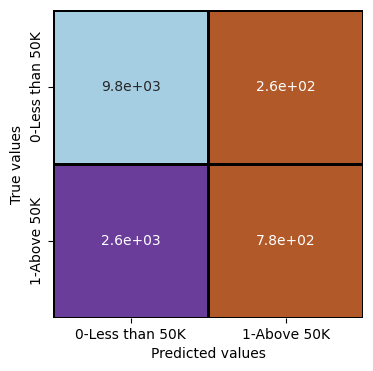

In [63]:
# to see true positive, true negative, false positive , false negative values by confusion matrix
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Paired_r",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
plt.show()

In [64]:
# To see last classification report
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.79      0.97      0.87     10093
    1-Above 50K       0.75      0.23      0.35      3357

       accuracy                           0.79     13450
      macro avg       0.77      0.60      0.61     13450
   weighted avg       0.78      0.79      0.74     13450



# Inference
+ The model has a good precision and high recall for label 0.
+ The model has good precision but very low recall for label 1. A recall of 0.23% means the model was able to identify only 23% of all the 1-labelled data present in test dataset.
+ So the model performs quite well for classifying label 0 data with high recall and moderate precision.

# plot histogram of predicted probabilities

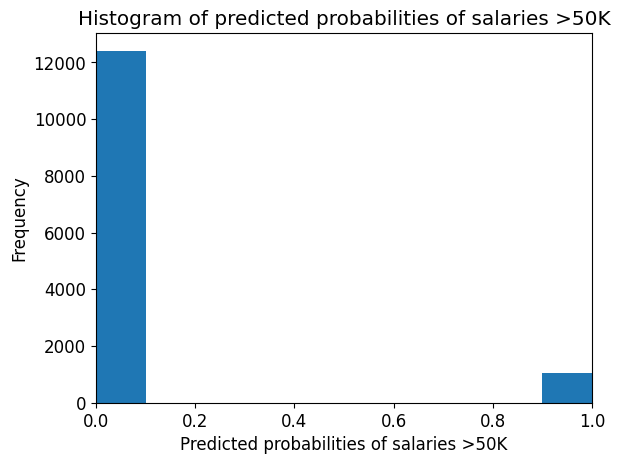

In [65]:
# adjust the font size
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')
plt.show()